In [119]:
!pip install sweetviz
!pip install  pandas

In [120]:
#importing necesary packages for data cleaning,visualization and EDA

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import sklearn.model_selection as train_test_split
import warnings
from scipy import stats


In [121]:
#supressing warnings for more clear outputs
warnings.filterwarnings("ignore")


#task-1 : data prepration
#reading the data
df = pd.read_csv("E:\\telco-customer-churn (2).csv")

#data overview 
print("Initial Data Oveerview:")
print(df.info())
print("\nInitial Data Description:")
print(df.describe())

Initial Data Oveerview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  

In [125]:
#checking for missing value
df = pd.read_csv("E:\\telco-customer-churn (2).csv")
print("\nmissing value in each column:")
missing_values = df.isnull().sum()
print("missing_values[missing_values > 0]")


missing value in each column:
missing_values[missing_values > 0]


In [127]:
# Replacing blank spaces with NaN and handling missing values

df.replace(" ", np.nan, inplace=True)
df.dropna(inplace=True)  
print("\nMissing values handled by dropping rows.")


Missing values handled by dropping rows.


In [129]:
#after dropping rows , re check for missing values

mappings = { 
    "yes": 1, "no": 0,
     "Female": 0, "Male": 1,
    "No phone service": 2, "No internet service": 3,
    "DSL": 4, "Fiber optic": 5,
    "Month-to-month": 6, "One year": 7, "Two year": 8,
    "Electronic check": 9, "Mailed check": 10,
    "Bank transfer (automatic)": 11, "Credit card (automatic)": 12,
    " ": -1  #this is for missing values
}

#applying mappingtooo each column

for col in df.columns:
    df[col] = df[col].map(mappings).fillna(df[col])

In [131]:
# dropping column

df = df.drop(columns=['customerID'])


In [133]:
# Outlier Detection using Z-score

z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
df = df[(z_scores < 3).all(axis=1)]  # Keeping rows with z-score less than 3
print("\nOutliers detected and removed using Z-score.")



Outliers detected and removed using Z-score.


In [135]:
#checking the transformed dataframe

print("\nTransformed Dataframe:")
print(df.head())


Transformed Dataframe:
   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0       0            0.0     Yes         No     1.0           No   
1       1            0.0      No         No    34.0          Yes   
2       1            0.0      No         No     2.0          Yes   
3       1            0.0      No         No    45.0           No   
4       0            0.0      No         No     2.0          Yes   

  MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0           2.0             4.0             No          Yes               No   
1            No             4.0            Yes           No              Yes   
2            No             4.0            Yes          Yes               No   
3           2.0             4.0            Yes           No              Yes   
4            No             5.0             No           No               No   

  TechSupport StreamingTV StreamingMovies  Contract PaperlessBilling  \
0          No 

In [137]:
  # Task 2 : list all ytype of data, numerical, catrgorical, text.

print("\nData types:")
print(df.dtypes)


Data types:
gender                int64
SeniorCitizen       float64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract              int64
PaperlessBilling     object
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


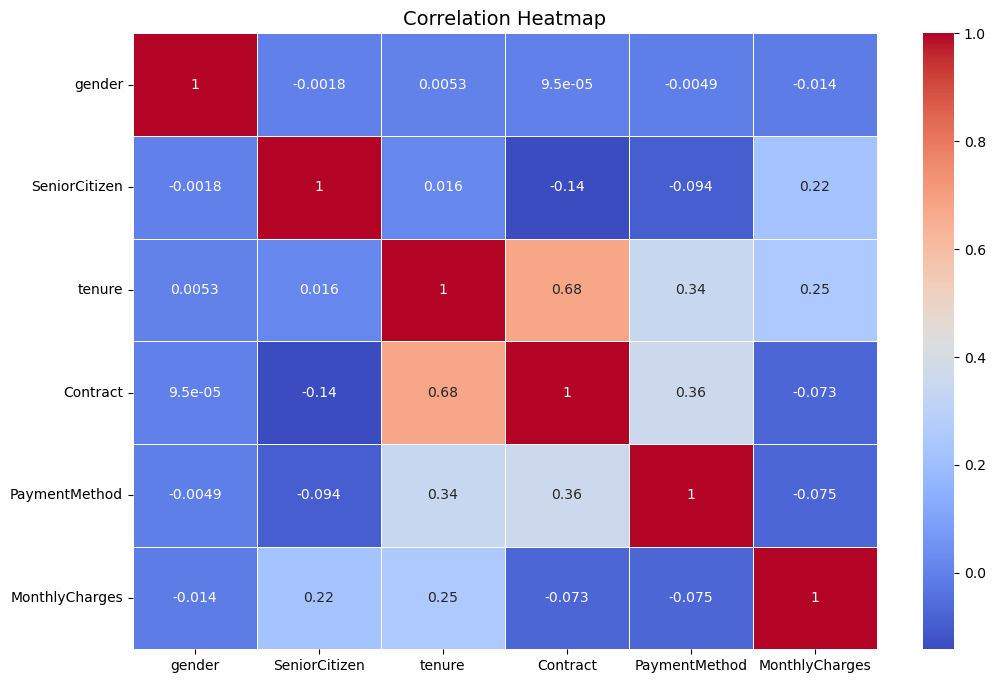

In [150]:
#Task 3: perform EDA

#listing most important variable targeting the data

plt.figure(figsize=(12, 8))

numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()      

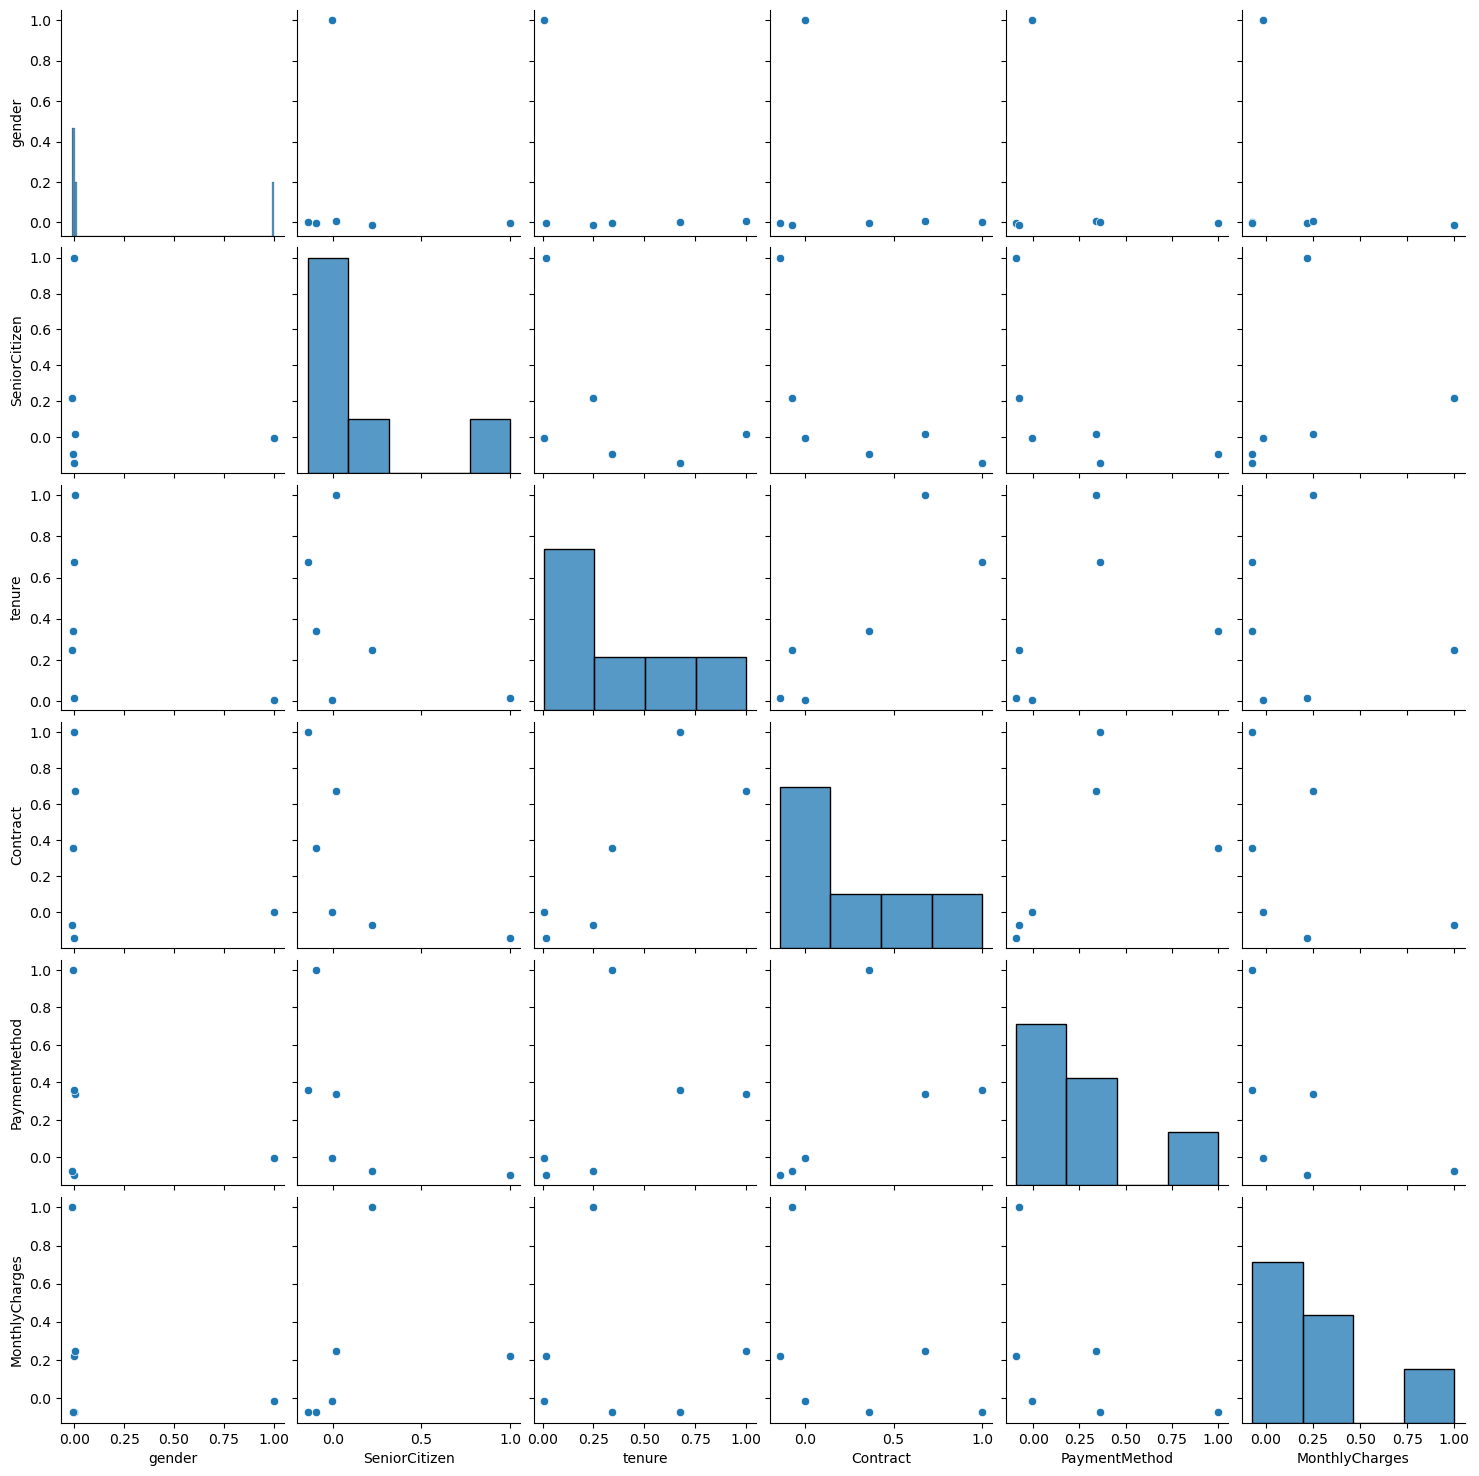

In [152]:
sns.pairplot(corr)

<Axes: >

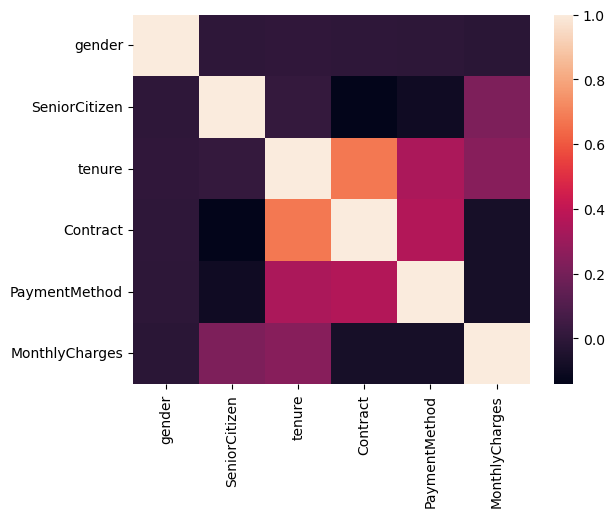

In [154]:
sns.heatmap(corr)

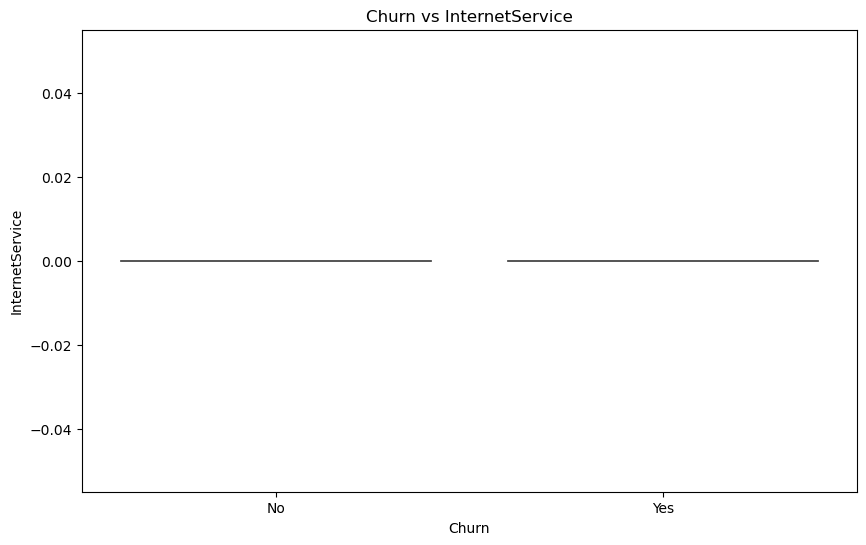

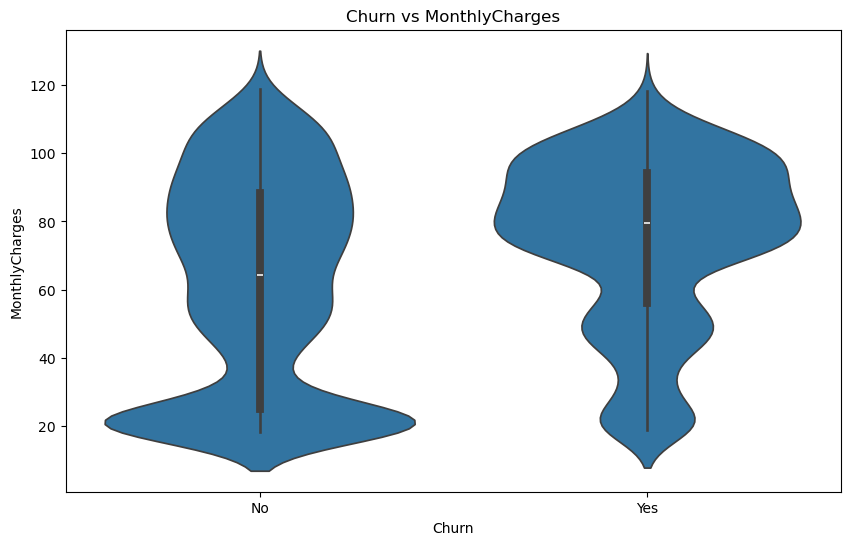

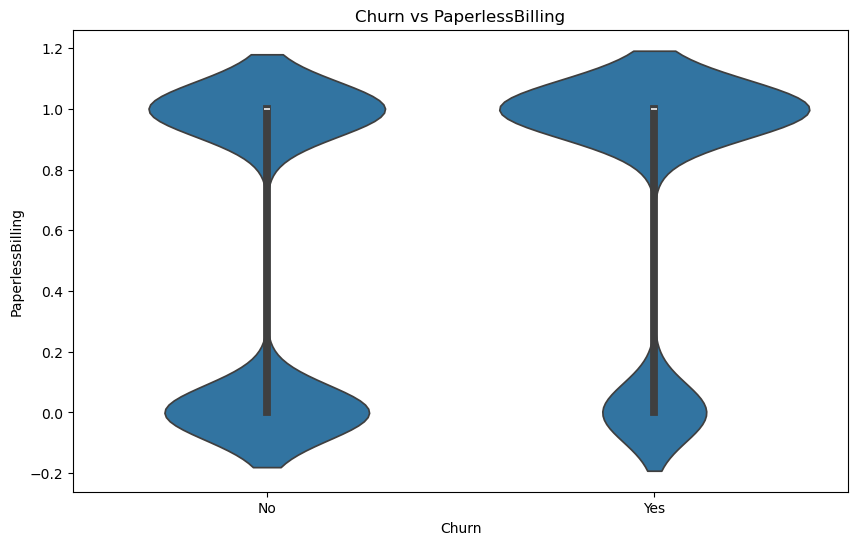

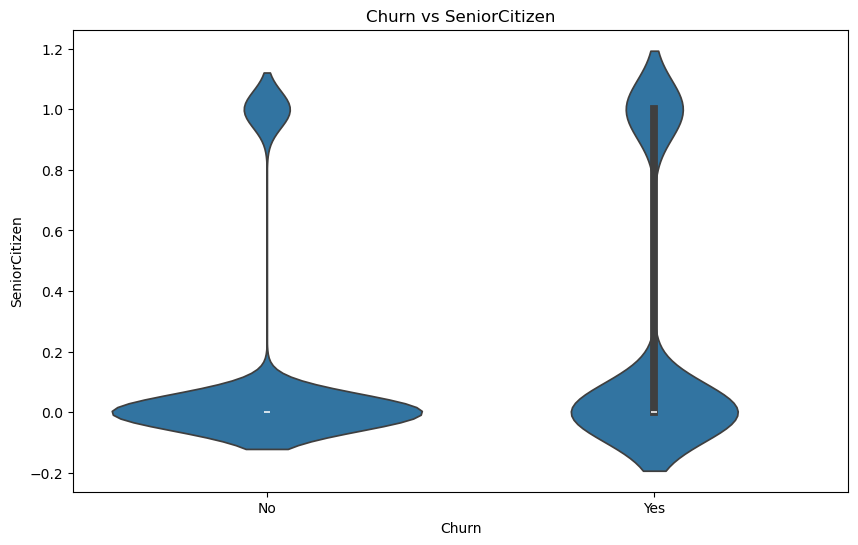

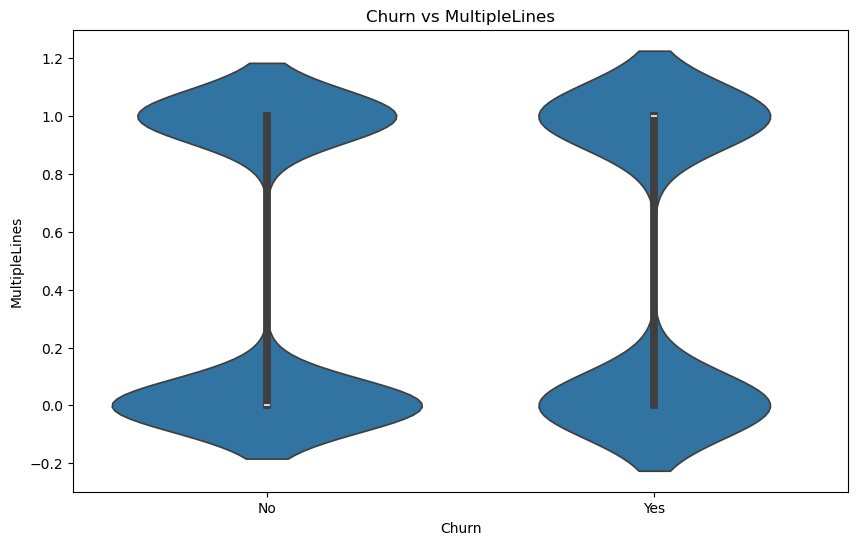

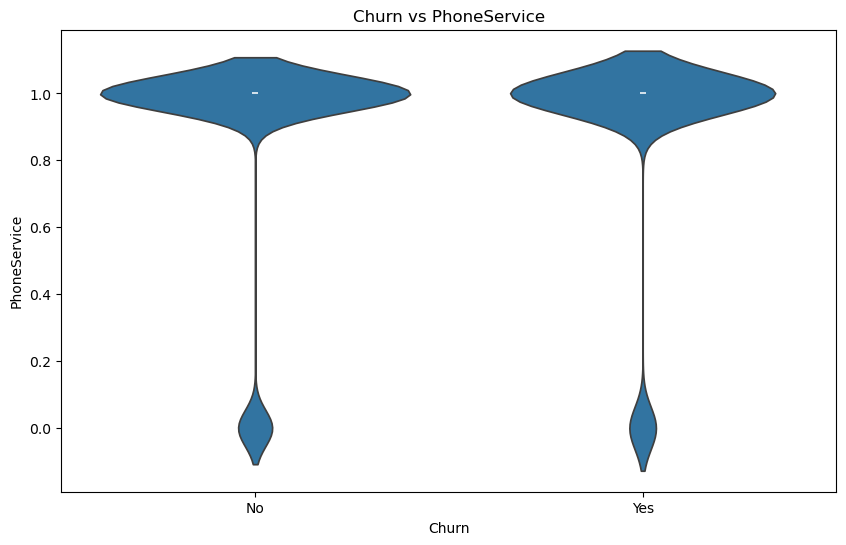

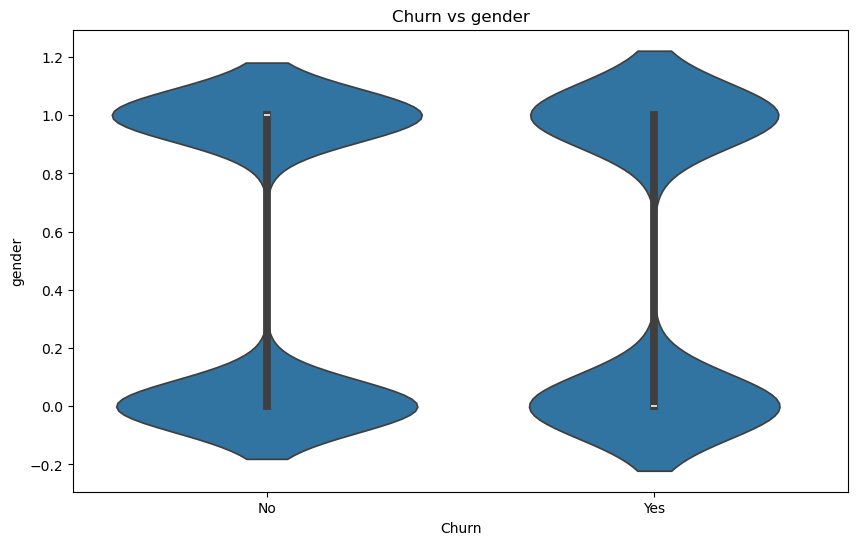

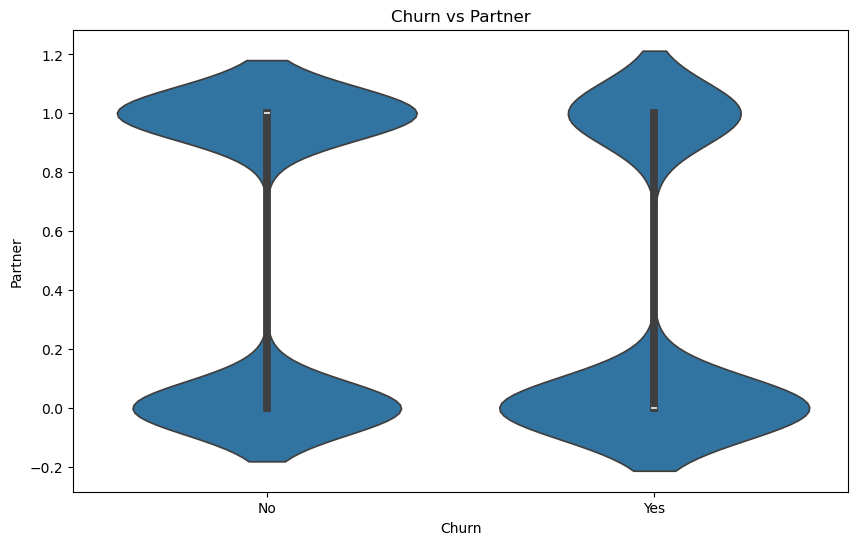

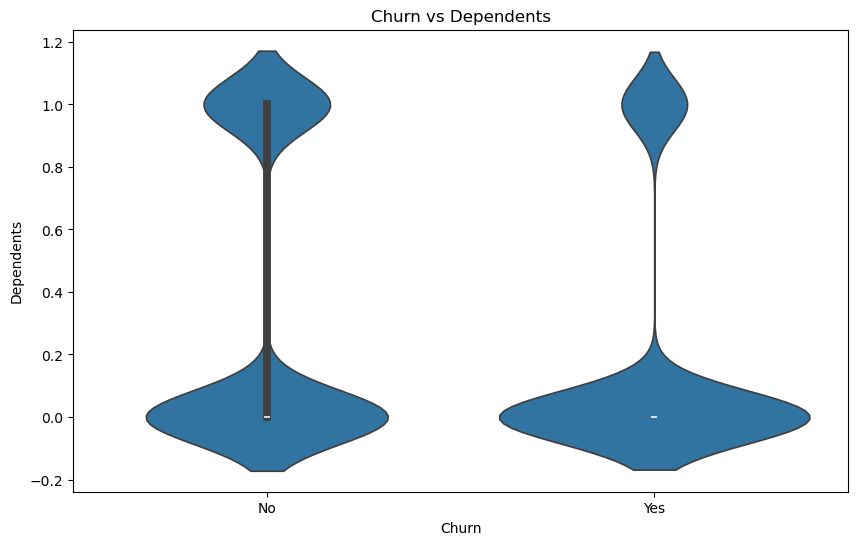

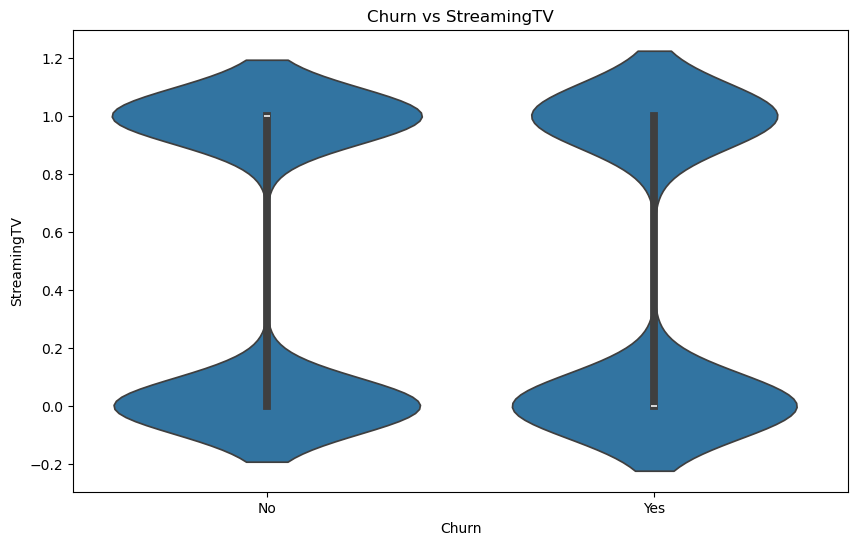

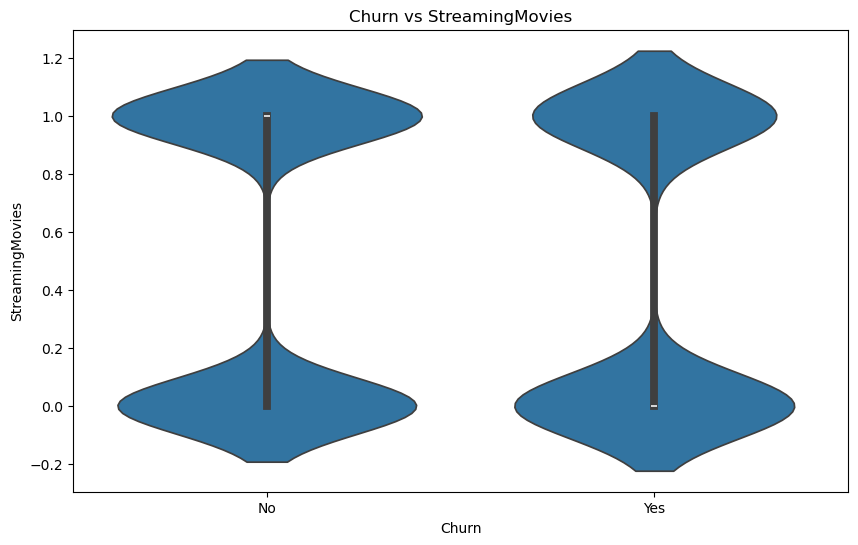

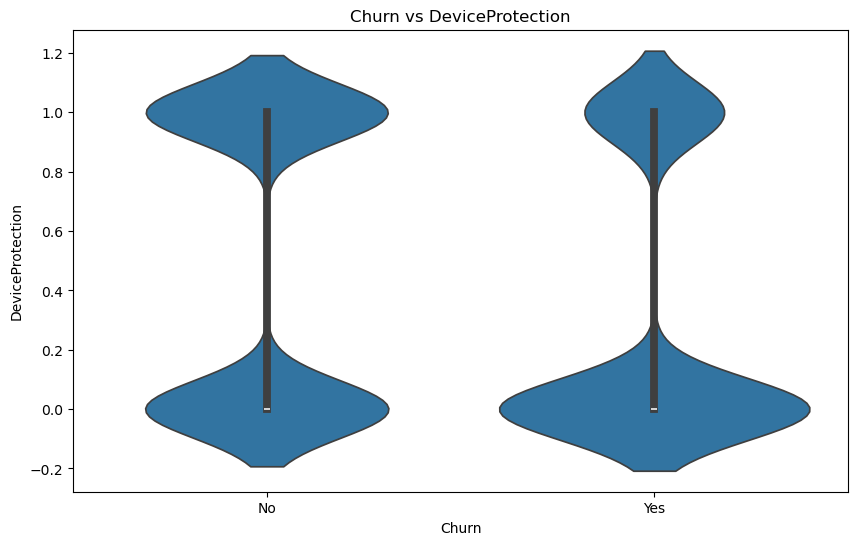

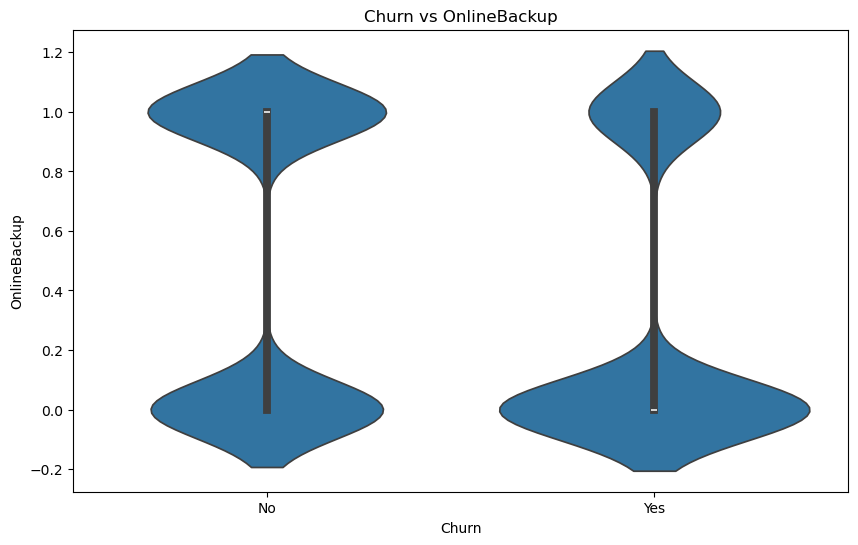

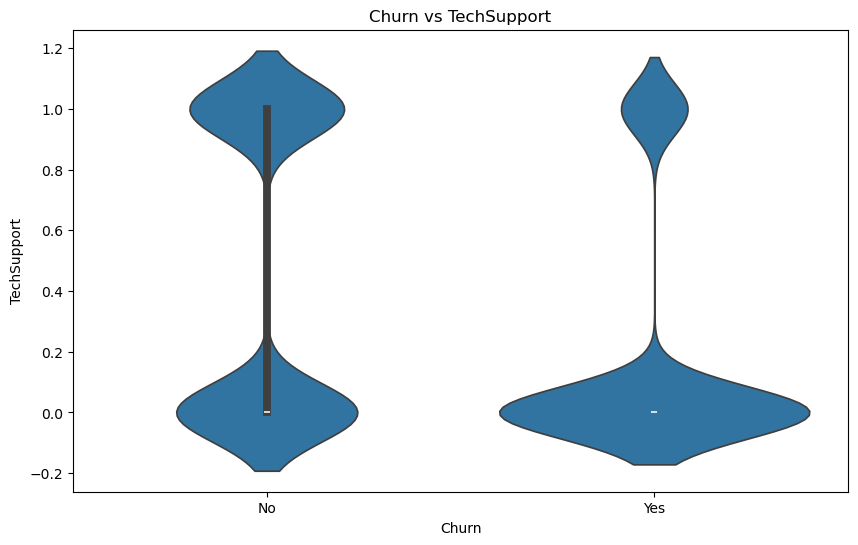

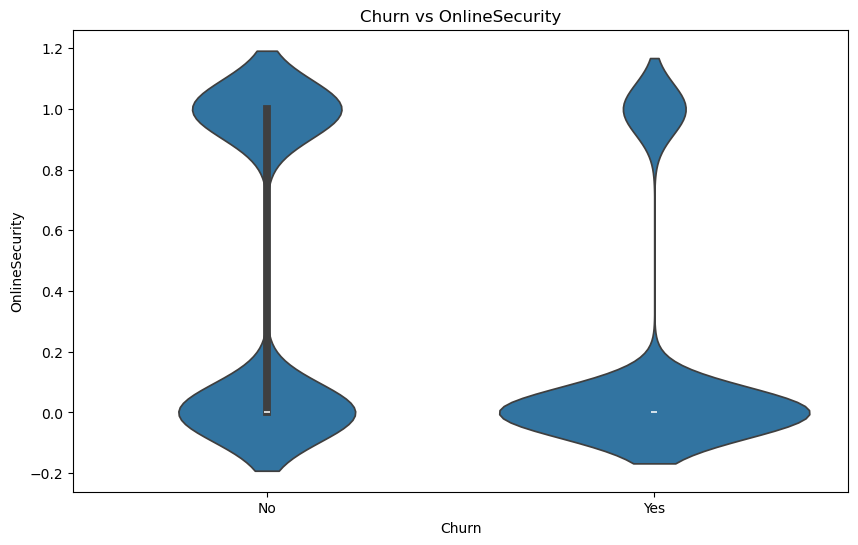

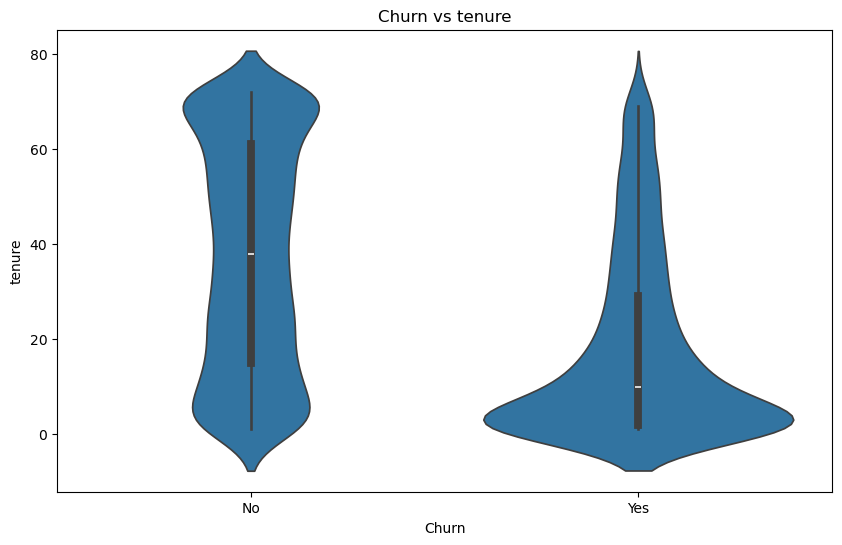

In [187]:
# Additional visualizations for EDA using violin plots (individual plots)

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_churn_vs_feature(df: pd.DataFrame, feature: str) -> None:
    """
    Plots a violin plot for Churn against a specified feature.

    Args:
    df (pd.DataFrame): The DataFrame containing the data.
    feature (str): The feature to plot against Churn.
    """
    plt.figure(figsize=(10, 6))
    # Check if the feature is numeric or can be converted to numeric
    if df[feature].dtype == 'object':
        # Convert categorical features to numeric using mapping
        df[feature] = df[feature].map({'Yes': 1, 'No': 0})  # Example mapping for binary features
    sns.violinplot(x='Churn', y=feature, data=df)
    plt.title(f'Churn vs {feature}')
    plt.show()

# List of features to plot against Churn
features = [
    'InternetService', 'MonthlyCharges', 'PaperlessBilling', 
    'SeniorCitizen', 'MultipleLines', 'PhoneService', 
    'gender', 'Partner', 'Dependents', 'StreamingTV', 
    'StreamingMovies', 'DeviceProtection', 'OnlineBackup', 
    'TechSupport', 'OnlineSecurity', 'tenure'
]

# Loop through each feature and create the plots
for feature in features:
    plot_churn_vs_feature(df, feature)

In [219]:
# Task 4: splitting datset into training and test dataset (80:20 ratio)

import sweetviz as sv 
from sklearn.model_selection import train_test_split 

train, test = train_test_split(df, test_size=0.2, random_state=42)

print(f"\nTraining set shape: {train.shape}")
print(f"Test set shape: {test.shape}")

if train.isnull().sum().sum() == 0 and test.isnull().sum().sum() == 0:
    ml_eda = sv.compare([train, "Train"], [test, "Test"], "Churn") 
    ml_eda.show_html('ml_eda.html')
else:
    print("Train or test set contains missing values. Please clean the data before using Sweetviz.")


Training set shape: (5625, 20)
Test set shape: (1407, 20)
Train or test set contains missing values. Please clean the data before using Sweetviz.




Step 5 :  Stating limitations/issues with the given dataset.

---> In this project, some common challenges with the dataset. First, missing values or outliers, which may distort the analysis unless properly handled. The dataset can be little imbalanced, with far fewer customers churning than staying, which could lead to biased results. 

---> Additionally, many features are categorical and need to be converted into numerical form for analysis, which can introduce complexity. Some features were redundant or we can say non informative, like customer IDs, while other information was  highly correlated, making it difficult to identify what really drives customer churn. 
